In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [13]:
plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})

In [14]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [15]:
import pandas as pd
import os

In [16]:
import phenom

In [17]:
import lal

In [18]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [4]:
import os
os.sys.path.append("/Users/sebastian.khan/personal/git/stk/ml/waveforms/oct2022/uncertainty")
import collocation as col

In [22]:
import sympy
# sympy.init_printing()
x_sym, a_sym, om_rd = sympy.symbols('x_sym a_sym om_rd')

In [5]:
import analysis_utils

In [6]:
catalogue_dir = "/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022"
names_to_drop=['RIT-BBH-0957-n084']
nr_data = analysis_utils.load_nr_data(catalogue_dir=catalogue_dir, names_to_drop=names_to_drop)

In [129]:
nr_data['df']

name      q     fring     fdamp  duration  t_final  \
0    q18a0a0c025_96_fine  18.00  0.063334  0.014140    1020.0    465.8   
1          q4a0_T_96_384   4.00  0.074330  0.014004    2202.1    229.5   
2    q8a0a0_T_96_504n512   8.00  0.067697  0.014104     953.1    430.4   
3     q8a0a0c05_T_80_420   8.00  0.067697  0.014104     941.9    259.8   
4      q10c25e_T_112_448  10.00  0.066184  0.014119    1157.7    121.6   
5          q4a0_T_80_320   4.00  0.074330  0.014004    2199.5    689.1   
6        q18a0a0c025_144  18.00  0.063334  0.014140    1028.3     88.8   
7   q8a0a0_T_112_588n768   8.00  0.067697  0.014104     957.9    207.8   
8        q18a0a0c025_120  18.00  0.063334  0.014140    1027.5    174.7   
9         q4a0_T_112_448   4.00  0.074330  0.014004    2202.5    151.8   
10     SXS_BBH_0107_Res3   5.00  0.071862  0.014048    7440.1    449.9   
11     SXS_BBH_0167_Res5   4.00  0.074330  0.014004    3115.7    404.1   
12     SXS_BBH_0107_Res5   5.00  0.071862  0.014048    7465.5    451.5   
13     SXS_BBH_0107_Res4   5.00  0.071862  0.014048    7457.2    449.8   
14     SXS_BBH_0167_Res3   4.00  0.074330  0.014004    2874.0    403.8   
15     SXS_BBH_0169_Res4   2.00  0.083149  0.013774    3458.2    406.7   
16     SXS_BBH_0169_Res5   2.00  0.083149  0.013774    3468.3    406.6   
17     SXS_BBH_0169_Res3   2.00  0.083149  0.013774    3088.2    406.7   
18     SXS_BBH_0180_Res3   1.00  0.088087  0.013596    9359.5    236.6   
19     SXS_BBH_0303_Res3  10.00  0.066184  0.014119    3397.6    498.9   
20     SXS_BBH_0180_Res2   1.00  0.088087  0.013596    9354.6    236.8   
21     SXS_BBH_0303_Res4  10.00  0.066184  0.014119    3433.2    499.1   
22     SXS_BBH_0180_Res4   1.00  0.088087  0.013596    9270.5    236.4   
23     SXS_BBH_0303_Res5  10.00  0.066184  0.014119    3461.4    499.7   
24     RIT-BBH-0416-n140   7.00  0.068739  0.014092    2362.1    363.1   
25     RIT-BBH-0084-n100   1.18  0.087761  0.013608    1602.1    396.2   
26     RIT-BBH-0152-n120   5.00  0.071862  0.014048    4000.5    557.5   
27    RIT-eBBH-1090-n100   1.00  0.088087  0.013596    1493.9    362.0   
28    RIT-eBBH-1133-n100   4.00  0.074330  0.014004    2143.1    712.8   
29    RIT-eBBH-1241-n100   1.33  0.087138  0.013633    1520.6    335.3   
30     RIT-BBH-0942-n120  15.00  0.064066  0.014135    1162.8    330.2   
31     RIT-BBH-0112-n100   1.00  0.088087  0.013596   16963.4    419.5   
32     RIT-BBH-0139-n140   2.41  0.080777  0.013847    2736.9    423.5   
33     RIT-BBH-0373-n140  15.00  0.064066  0.014135    2725.0    437.6   
34     RIT-BBH-0792-n120  32.00  0.061687  0.014149    1558.3    191.2   
35     RIT-BBH-0090-n100   6.00  0.070079  0.014075    1746.7    392.9   
36     RIT-BBH-1020-n144   1.82  0.084262  0.013737    1368.2    249.8   
37    RIT-eBBH-1200-n100   2.00  0.083149  0.013774    1637.8    318.1   
38     RIT-BBH-0978-n144  10.00  0.066184  0.014119    1963.0    393.4   
39     RIT-BBH-1025-n100  32.00  0.061687  0.014149    1474.0    240.2   
40                GT0379   2.20  0.081956  0.013812     936.3    616.9   
41                GT0378   2.05  0.082845  0.013784     915.7    637.3   
42                GT0757   2.25  0.081668  0.013820    1429.1    420.0   
43                GT0380   2.35  0.081105  0.013837     957.9    595.3   
44                GT0454   4.00  0.074330  0.014004    1855.1    495.1   
45                GT0898   1.20  0.087693  0.013611    1793.9    286.8   
46                GT0446   2.00  0.083149  0.013774    1378.6    470.3   
47                GT0453   3.00  0.077907  0.013924    1599.7    549.9   
48                GT0727   1.75  0.084699  0.013722    1330.0    418.7   
49                GT0477   1.50  0.086221  0.013667    1286.6    361.9   
50                GT0738   1.25  0.087500  0.013619    1252.6    395.9   
51                GT0577   5.00  0.071862  0.014048    1281.6    574.2   
52                GT0565   2.50  0.080296  0.013861    1484.2    465.0   
53                GT0604

In [9]:
nr_data['df'][nr_data['df']['q']==1]

name    q     fring     fdamp  duration  t_final  \
18   SXS_BBH_0180_Res3  1.0  0.088087  0.013596    9359.5    236.6   
20   SXS_BBH_0180_Res2  1.0  0.088087  0.013596    9354.6    236.8   
22   SXS_BBH_0180_Res4  1.0  0.088087  0.013596    9270.5    236.4   
27  RIT-eBBH-1090-n100  1.0  0.088087  0.013596    1493.9    362.0   
31   RIT-BBH-0112-n100  1.0  0.088087  0.013596   16963.4    419.5   

    start_freq_100Msun  
18           18.842745  
20           18.843902  
22           18.842414  
27           18.698119  
31           18.816687

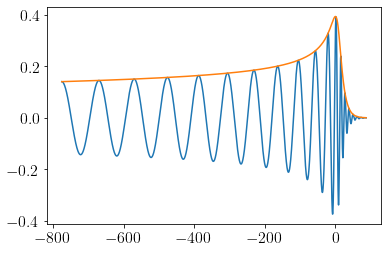

In [21]:
plt.plot(nr_data['times'], nr_data['strains'][22].real)
plt.plot(nr_data['times'], np.abs(nr_data['strains'][22]))

In [449]:
idx = 4

meta_data = nr_data['df'].iloc[idx]

wf_data = nr_data['strains'][idx]
times = nr_data['times']

inv_damp_time = meta_data['fdamp']*2*np.pi

x = times
y = np.abs(wf_data)

iy = IUS(x, y) # interpolate so we can estimate derivatives

In [450]:
meta_data

name                  q10c25e_T_112_448
q                                  10.0
fring                          0.066184
fdamp                          0.014119
duration                         1157.7
t_final                           121.6
start_freq_100Msun            24.089458
Name: 4, dtype: object

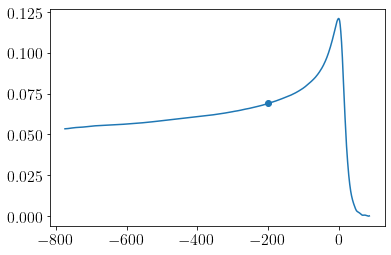

In [451]:
plt.plot(x, y)
plt.scatter(-200, iy(-200))

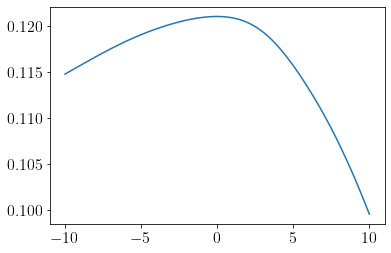

In [452]:
x_ = np.linspace(-10, 10, 100)
plt.plot(x_, iy(x_))

# ansatz

In [453]:
# collocation_points={0:[-100, 0], 1:[-100, 0], 2:[-100, 0], 3:[-100, 0]}
collocation_points={0:[-300, -100, -12, 0], 1:[0]}
rhs={d:np.array(list(map(iy.derivative(d), collocation_points[d]))) for d in collocation_points.keys()}
sub_dict=dict(a_sym=inv_damp_time)

In [454]:
n_terms = len(np.concatenate([v for k, v in collocation_points.items()]))
n_terms

5

In [455]:
ansatz = np.sum([sympy.asinh(a_sym * x_sym)**power for power in range(n_terms)])

In [456]:
ansatz

asinh(a_sym*x_sym)**4 + asinh(a_sym*x_sym)**3 + asinh(a_sym*x_sym)**2 + asinh(a_sym*x_sym) + 1

In [457]:
ps=dict(
    collocation_points=collocation_points,
    rhs=rhs,
    ansatz=ansatz,
    sub_dict=sub_dict,
)

In [458]:
cm = col.CollocationModelNew(**ps)

In [459]:
cm.coeffs

array([ 1.21005867e-01, -1.23355292e-02, -3.27970756e-03, -2.73949667e-04,
       -7.57717900e-05])

In [460]:
cm.rhs

{0: array([0.06399497, 0.07842044, 0.11289714, 0.12100587]),
 1: array([-6.72179561e-06])}

In [461]:
# cm.information_matrix

In [462]:
x_ = np.arange(-300, 0, 0.1)

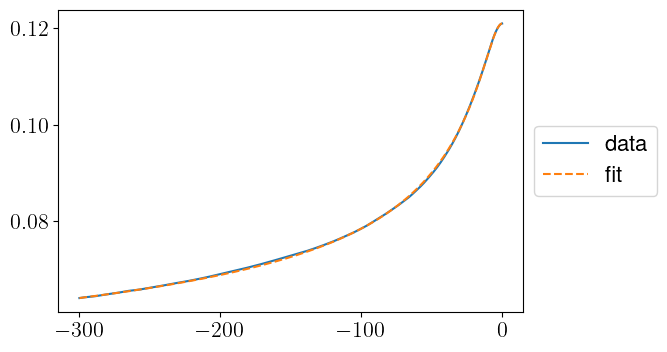

In [463]:
plt.figure(dpi=100)
plt.plot(x_, iy(x_), label='data')
plt.plot(x_, cm.predict(x_), label='fit', ls='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [468]:
np.max(np.abs(iy(x_)- cm.predict(x_)))

0.0003141235768830547

In [464]:
np.argmax(np.abs(iy(x_)- cm.predict(x_)))

2537

In [465]:
x_[np.argmax(np.abs(iy(x_)- cm.predict(x_)))]

-46.299999999942315

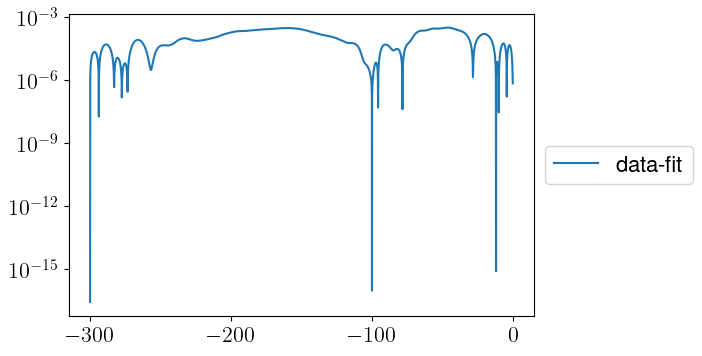

In [466]:
plt.figure(dpi=100)
plt.plot(x_, np.abs(iy(x_)- cm.predict(x_)), label='data-fit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')